# This script processes the sycl results of the minRadius and maxNumber studies

1. Compile parallelgpu using stage1tbbrem :
```
make bin/parallelgpu
```
2. Run the benchmarking script
```
cd scripts
python3 run_sycl_minradius
```
3. The output that we will process is owm_sycl_coffee.csv



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename, type='minRadius'):
    results ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            name=tokens[0].split("/")[3][:-5]
            nth=int(tokens[1])
            if type == 'minRadius':
                minRad = float(tokens[2])
            else:
                minRad = int(tokens[3])
            if name not in results:
                results[name]={}
            if minRad not in results[name]:
                results[name][minRad]={}
            results[name][minRad][nth]=[float(tokens[5])] # tree construction time
            results[name][minRad][nth].append(float(tokens[6])) # tree copy time
            results[name][minRad][nth].append(float(tokens[7])) # owm time
            results[name][minRad][nth].append(float(tokens[11])) # accuracy

    #print(results)

    return results

res1=tokenize("owm_sycl_coffee.csv","minRadius")

#print(results)



In [2]:
#For the best minRadius (see next cell) find the min and max accuracy for 1,2,4,6 and 8 threads
print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
for i,k in zip(res1,[0.9,0.4,0.1,0.1]):
    accuracy=[res1[i][k][j][3] for j in [1,2,4,6,8]]
    minaccuracy=min(accuracy)
    maxaccuracy=max(accuracy)
    print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Cloud & Min accuracy & Max accuracy\\ \hline
Alcoy & 99.27\% & 99.85\%\\ \hline
Arzua & 99.06\% & 99.13\%\\ \hline
BrionF & 99.36\% & 99.46\%\\ \hline
BrionU & 99.21\% & 99.24\%\\ \hline


In [3]:
for i in res1:
    times=[res1[i][j][1][2] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has sequential OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][0.1][1][2] ))
    print("Cloud {} with best minRadius {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,res1[i][0.1][1][2]/mintime))


Cloud Alcoy with baseline minRadius 0.1 has sequential OWM time = 1.88
Cloud Alcoy with best minRadius 0.9 has sequential OWM best time (speedup) = 0.90 (2.09x)
Cloud Arzua with baseline minRadius 0.1 has sequential OWM time = 1.30
Cloud Arzua with best minRadius 0.4 has sequential OWM best time (speedup) = 0.94 (1.38x)
Cloud BrionF with baseline minRadius 0.1 has sequential OWM time = 0.44
Cloud BrionF with best minRadius 0.1 has sequential OWM best time (speedup) = 0.44 (1.00x)
Cloud BrionU with baseline minRadius 0.1 has sequential OWM time = 0.48
Cloud BrionU with best minRadius 0.1 has sequential OWM best time (speedup) = 0.48 (1.00x)


In [4]:
for i in res1:
    times=[res1[i][j][8][2] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has 8-core OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][0.1][8][2] ))
    print("Cloud {} with best minRadius {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,res1[i][0.1][8][2]/mintime))


Cloud Alcoy with baseline minRadius 0.1 has 8-core OWM time = 0.39
Cloud Alcoy with best minRadius 0.7 has 8-core OWM best time (speedup) = 0.19 (2.12x)
Cloud Arzua with baseline minRadius 0.1 has 8-core OWM time = 0.26
Cloud Arzua with best minRadius 0.3 has 8-core OWM best time (speedup) = 0.18 (1.40x)
Cloud BrionF with baseline minRadius 0.1 has 8-core OWM time = 0.10
Cloud BrionF with best minRadius 0.1 has 8-core OWM best time (speedup) = 0.10 (1.00x)
Cloud BrionU with baseline minRadius 0.1 has 8-core OWM time = 0.11
Cloud BrionU with best minRadius 0.1 has 8-core OWM best time (speedup) = 0.11 (1.00x)


In [5]:
for i in res1:
    times=[res1[i][j][1][0] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with minRadius {:.1f} has qtree creation best time = {:.2f}".format(i,list(res1[i].keys())[minRad],mintime ))


Cloud Alcoy with minRadius 1.9 has qtree creation best time = 0.69
Cloud Arzua with minRadius 2.0 has qtree creation best time = 1.22
Cloud BrionF with minRadius 1.9 has qtree creation best time = 1.60
Cloud BrionU with minRadius 1.5 has qtree creation best time = 1.82


In [6]:
for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][1]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    baselinetotaltime=res1[i][0.1][8][0]+res1[i][0.1][8][1]+res1[i][0.1][8][2]
    print("Cloud {} with baseline minRadius {:.1f} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res1[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best minRadius {:.1f} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,baselinetotaltime/mintime))


Cloud Alcoy with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 2.78
Cloud Alcoy with best minRadius 1.5 has total (8-core owm + qtree creation) best time (speedup) = 0.53 (5.21x)
Cloud Arzua with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 2.23
Cloud Arzua with best minRadius 1.8 has total (8-core owm + qtree creation) best time (speedup) = 0.75 (2.98x)
Cloud BrionF with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 1.88
Cloud BrionF with best minRadius 0.4 has total (8-core owm + qtree creation) best time (speedup) = 1.23 (1.52x)
Cloud BrionU with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 2.08
Cloud BrionU with best minRadius 0.7 has total (8-core owm + qtree creation) best time (speedup) = 1.37 (1.52x)


# Execution time for each cloud with sycl version depending on minRadius

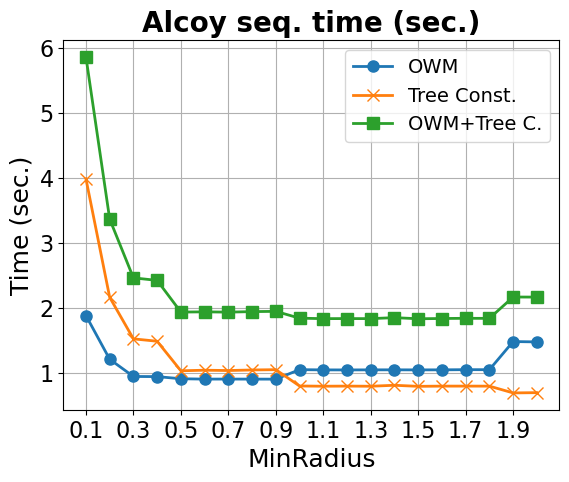

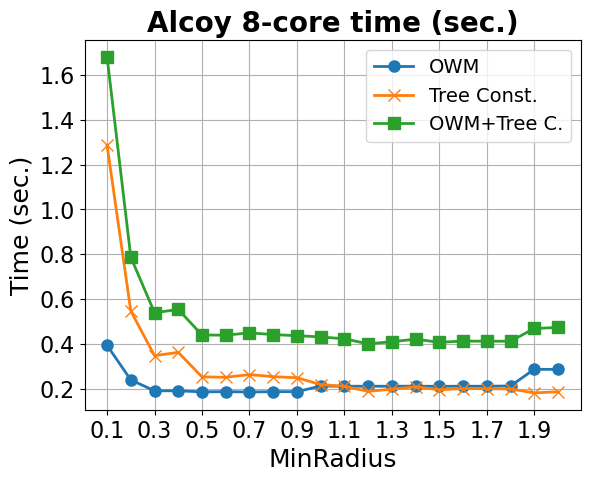

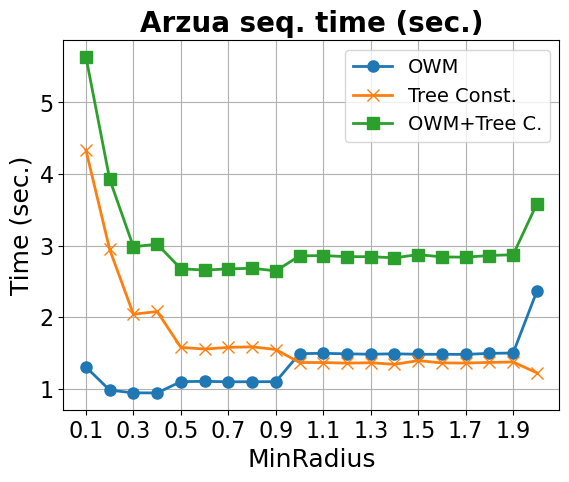

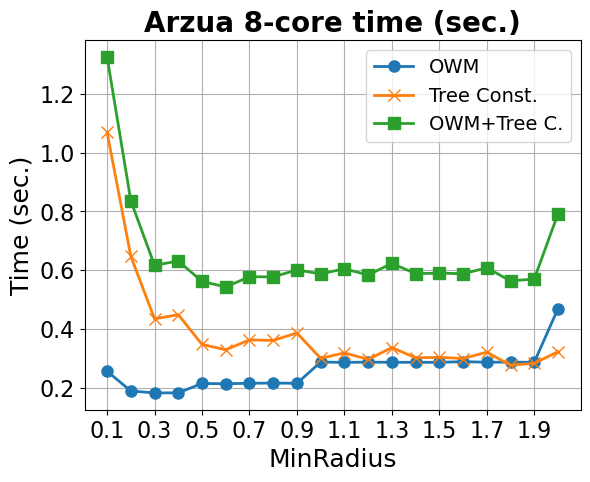

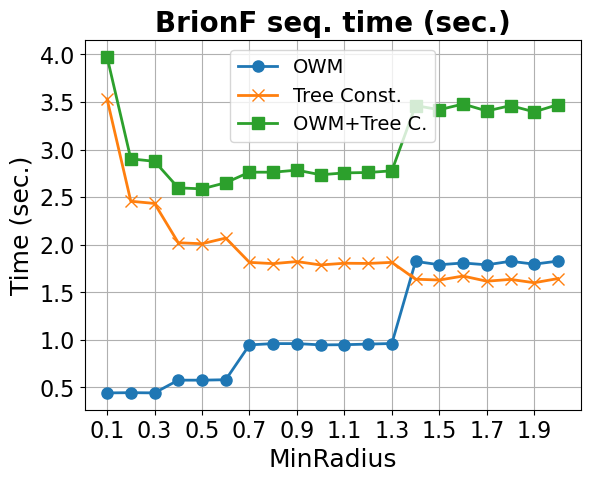

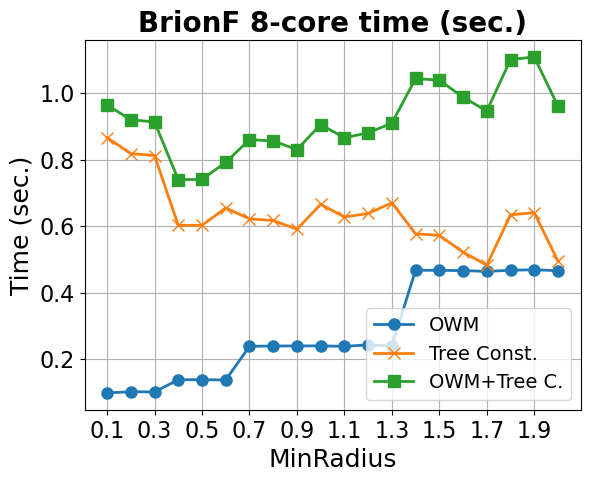

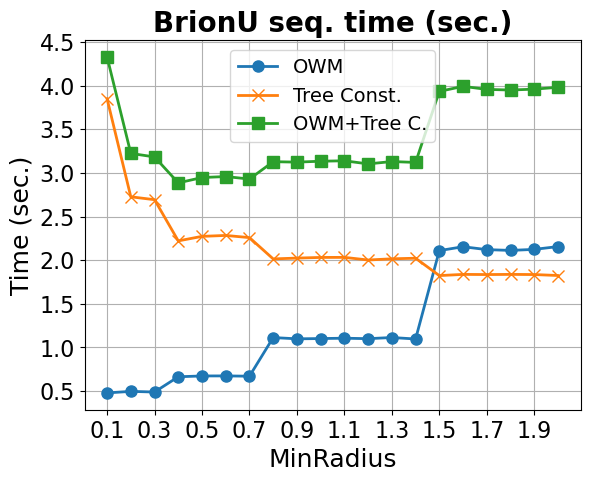

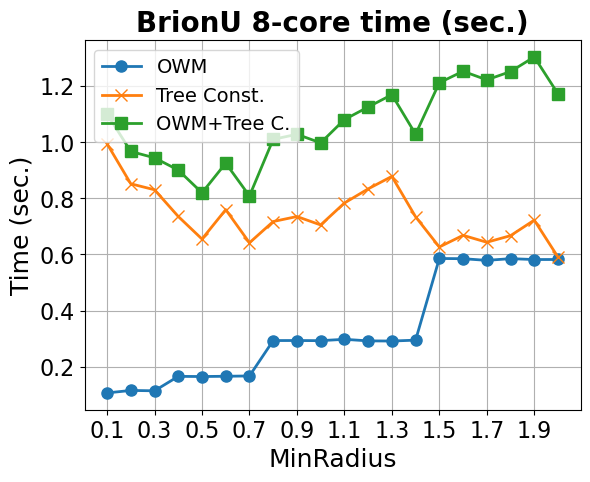

In [7]:
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][0]+results[cloudname][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Tree Const.','OWM+Tree C.']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MinRadius', fontsize=xlabelfs)
    plt.xticks(x[::2],fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('Alcoy',1,res1)
plot_cloudtime('Alcoy',8,res1)
plot_cloudtime('Arzua',1,res1)
plot_cloudtime('Arzua',8,res1)
plot_cloudtime('BrionF',1,res1)
plot_cloudtime('BrionF',8,res1)
plot_cloudtime('BrionU',1,res1)
plot_cloudtime('BrionU',8,res1)

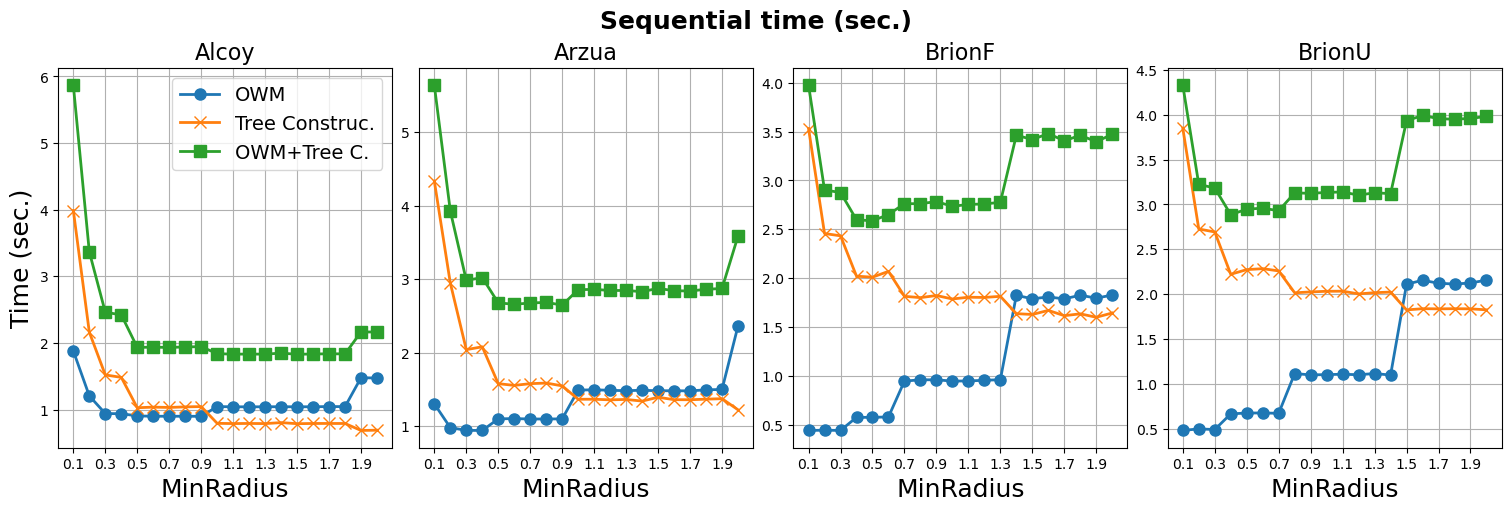

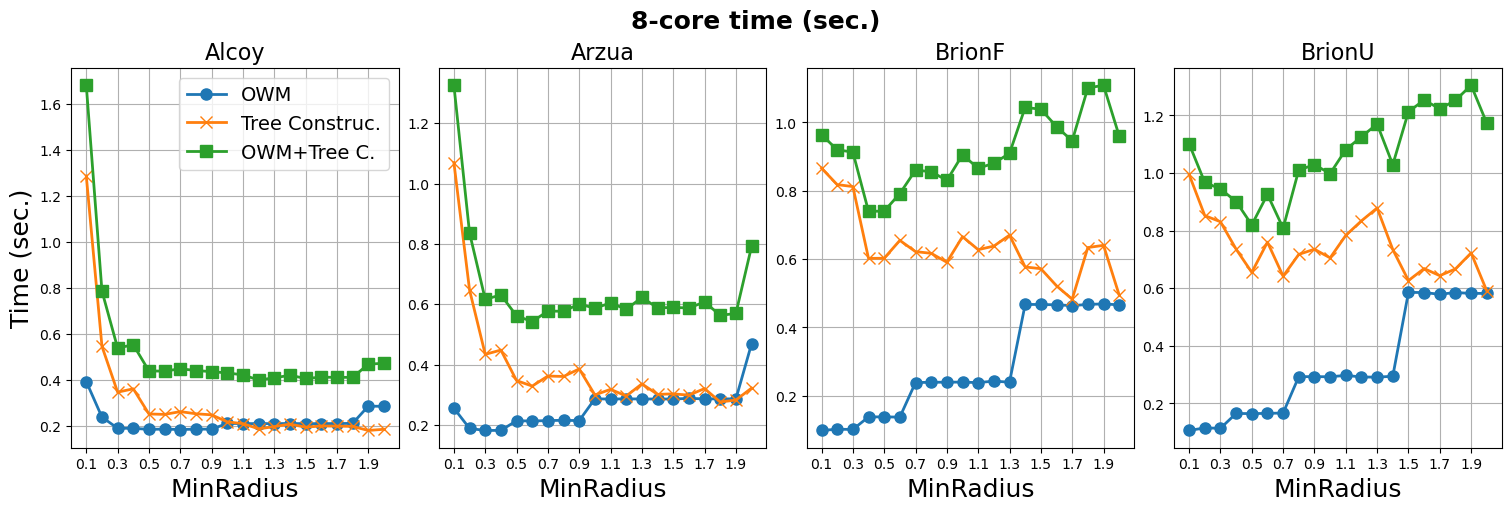

In [8]:
def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Tree Construc.','OWM+Tree C.']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):
        x=list(results[name].keys())
        axs[i].plot(np.array(x), np.array([results[name][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth][0]+results[name][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('MinRadius', fontsize=xlabelfs)
        axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()

plot_alltimes(1,res1)
plot_alltimes(8,res1)


# Speed up (using total time) for the best minRadius (for total time, that are [1.5,1.8,0.4,0.7])

[1.         1.82212733 2.54099407 3.11804174 4.01927117]
[1.         1.96399262 2.67556967 3.24666602 4.94267594]
[1.         1.87465927 2.25333168 2.97146551 3.35661672]
[1.         1.8367294  2.21130989 2.512399   3.51864739]
[1.         1.84193244 2.69691627 3.7836919  4.92998954]
[1.         1.89946429 2.80964801 4.05000407 5.20694041]
[1.         1.75257425 2.65567838 3.54372708 4.18905415]
[1.         1.82219735 2.64298912 3.56492582 4.02043593]
[1.         1.82212733 2.54099407 3.11804174 4.01927117]
[1.         1.96399262 2.67556967 3.24666602 4.94267594]
[1.         1.87465927 2.25333168 2.97146551 3.35661672]
[1.         1.8367294  2.21130989 2.512399   3.51864739]


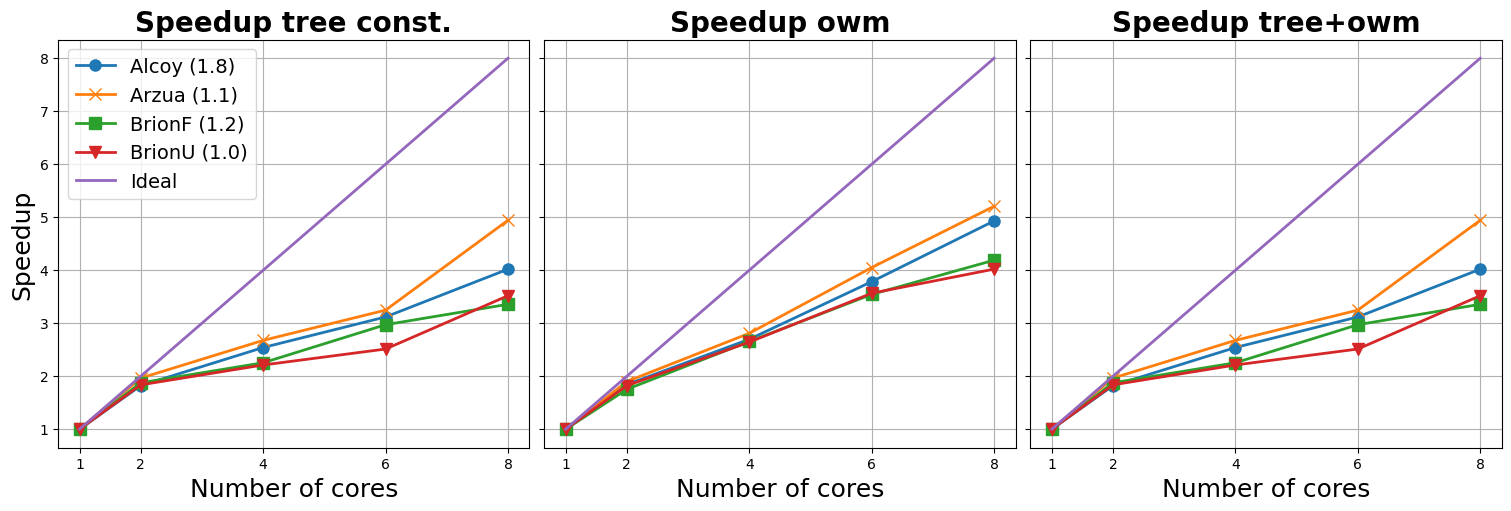

In [9]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

marks=['o-','x-','s-','v-','+-']
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)

for (i,z,k) in zip(res1,marks,[1.5,1.8,0.4,0.7]):
    print(np.array([res1[i][k][1][0]/res1[i][k][j][0] for j in [1,2,4,6,8]]))
    axs[0].plot(np.array([1,2,4,6,8]), np.array([res1[i][k][1][0]/res1[i][k][j][0] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[0].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res1,marks,[1.5,1.8,0.4,0.7]):
    print(np.array([res1[i][k][1][2]/res1[i][k][j][2] for j in [1,2,4,6,8]]))
    axs[1].plot(np.array([1,2,4,6,8]), np.array([res1[i][k][1][2]/res1[i][k][j][2] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[1].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res1,marks,[1.5,1.8,0.4,0.7]):
    print(np.array([sum(res1[i][k][1][0:2:2])/sum(res1[i][k][j][0:2:2]) for j in [1,2,4,6,8]]))
    axs[2].plot(np.array([1,2,4,6,8]), np.array([sum(res1[i][k][1][0:2:2])/sum(res1[i][k][j][0:2:2]) for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[2].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=['Alcoy (1.8)', 'Arzua (1.1)', 'BrionF (1.2)', 'BrionU (1.0)']
sizes.append('Ideal')
axs[0].legend(sizes,loc='best', fontsize= legendfs)
axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
axs[0].set_title('Speedup tree const.',  fontweight='bold', fontsize=titlefs)
axs[0].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[0].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[0].grid()
axs[1].set_title('Speedup owm',  fontweight='bold', fontsize=titlefs)
axs[1].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[1].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[1].grid()
axs[2].set_title('Speedup tree+owm',  fontweight='bold', fontsize=titlefs)
axs[2].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[2].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[2].grid()
#plt.yticks(fontsize=yticksfs)

#fig.suptitle('Speedup',fontweight='bold', fontsize=24)

In [10]:

pp = PdfPages("Speedup-qmin.pdf")
pp.savefig(fig)
pp.close()

# Now processes the sycl results of the maxnumber study 

1. Compile parallelmaxnum using stage1tbbrem:
```
make bin/parallelmaxnum
```
2. Run the benchmarking script
```
cd scripts
python3 run_sycl_maxnumber
```
3. The output that we will process is owm_syclmaxnum_coffee.csv



In [11]:
res2=tokenize("owm_syclmaxnum_coffee.csv",'maxNumber')

#print(results)
#For the best maxNumber (see next cell) find the min and max accuracy for 1,2,4,6 and 8 threads
print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
for i,k in zip(res2,[64,64,64,64]):
    accuracy=[res2[i][k][j][3] for j in [1,2,4,6,8]]
    minaccuracy=min(accuracy)
    maxaccuracy=max(accuracy)
    print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Cloud & Min accuracy & Max accuracy\\ \hline
Alcoy & 99.50\% & 99.85\%\\ \hline
Arzua & 98.89\% & 99.11\%\\ \hline
BrionF & 99.33\% & 99.46\%\\ \hline
BrionU & 99.05\% & 99.24\%\\ \hline


In [12]:

for i in res2:
    times=[res2[i][j][1][2] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline maxNumber {} has sequential OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][32][1][2] ))
    print("Cloud {} with best maxNumber {} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,res2[i][32][1][2]/mintime))


Cloud Alcoy with baseline maxNumber 32 has sequential OWM time = 0.92
Cloud Alcoy with best maxNumber 64 has sequential OWM best time (speedup) = 0.90 (1.02x)
Cloud Arzua with baseline maxNumber 32 has sequential OWM time = 0.94
Cloud Arzua with best maxNumber 64 has sequential OWM best time (speedup) = 0.92 (1.03x)
Cloud BrionF with baseline maxNumber 32 has sequential OWM time = 0.46
Cloud BrionF with best maxNumber 64 has sequential OWM best time (speedup) = 0.43 (1.06x)
Cloud BrionU with baseline maxNumber 32 has sequential OWM time = 0.51
Cloud BrionU with best maxNumber 64 has sequential OWM best time (speedup) = 0.47 (1.07x)


In [13]:
for i in res2:
    times=[res2[i][j][8][2] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline maxNumber {} has 8-core OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][32][8][2] ))
    print("Cloud {} with best maxNumber {} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,res2[i][32][8][2]/mintime))


Cloud Alcoy with baseline maxNumber 32 has 8-core OWM time = 0.19
Cloud Alcoy with best maxNumber 64 has 8-core OWM best time (speedup) = 0.19 (1.01x)
Cloud Arzua with baseline maxNumber 32 has 8-core OWM time = 0.18
Cloud Arzua with best maxNumber 64 has 8-core OWM best time (speedup) = 0.18 (1.02x)
Cloud BrionF with baseline maxNumber 32 has 8-core OWM time = 0.10
Cloud BrionF with best maxNumber 64 has 8-core OWM best time (speedup) = 0.10 (1.03x)
Cloud BrionU with baseline maxNumber 32 has 8-core OWM time = 0.11
Cloud BrionU with best maxNumber 64 has 8-core OWM best time (speedup) = 0.11 (1.05x)


In [14]:

for i in res2:
    times=[res2[i][j][1][0] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with maxNumber {} has qtree creation best time = {:.2f}".format(i,list(res2[i].keys())[minRad],mintime ))


Cloud Alcoy with maxNumber 65536 has qtree creation best time = 0.89
Cloud Arzua with maxNumber 65536 has qtree creation best time = 1.75
Cloud BrionF with maxNumber 32768 has qtree creation best time = 2.93
Cloud BrionU with maxNumber 1024 has qtree creation best time = 3.53


In [15]:

for i in res2:
    times=[res2[i][j][1][0]+res2[i][j][1][2] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    baselinetotaltime=res2[i][32][1][0]+res2[i][32][8][2]
    print("Cloud {} with baseline maxNumber {} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res2[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best maxNumber {} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,baselinetotaltime/mintime))


Cloud Alcoy with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 2.12
Cloud Alcoy with best maxNumber 256 has total (8-core owm + qtree creation) best time (speedup) = 2.21 (0.96x)
Cloud Arzua with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 3.76
Cloud Arzua with best maxNumber 512 has total (8-core owm + qtree creation) best time (speedup) = 3.38 (1.11x)
Cloud BrionF with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 4.92
Cloud BrionF with best maxNumber 512 has total (8-core owm + qtree creation) best time (speedup) = 3.64 (1.35x)
Cloud BrionU with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 5.73
Cloud BrionU with best maxNumber 1024 has total (8-core owm + qtree creation) best time (speedup) = 4.27 (1.34x)


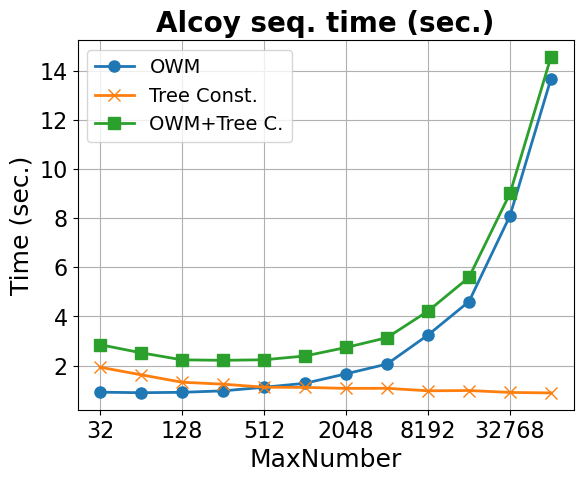

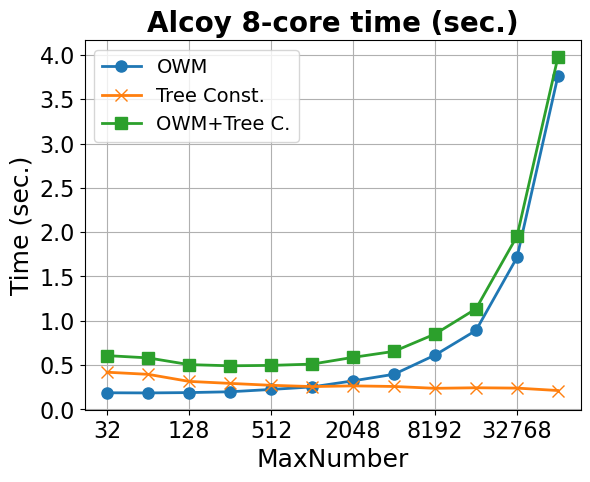

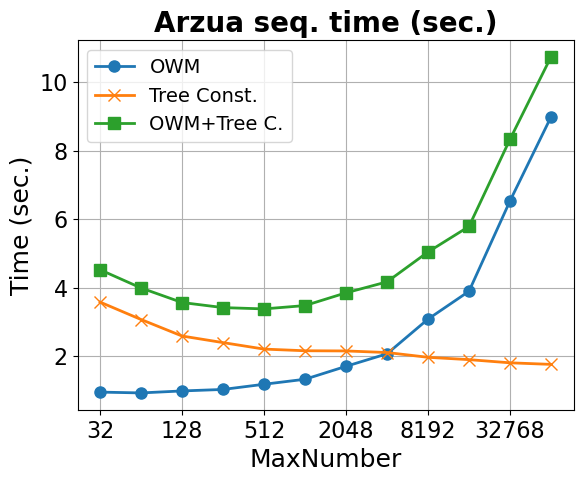

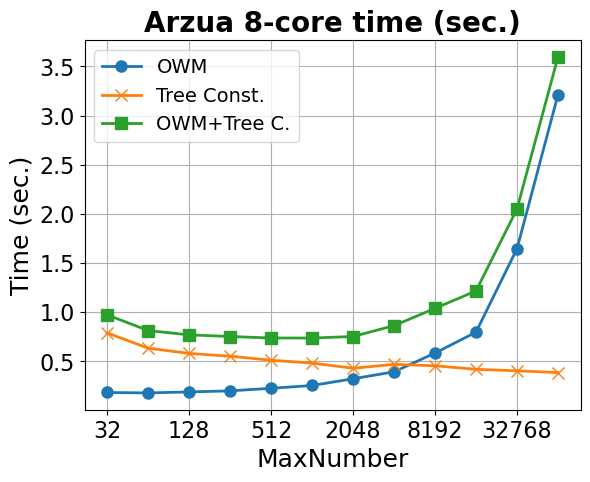

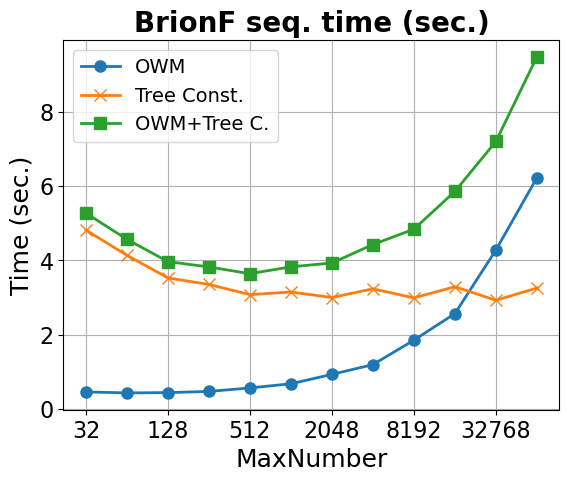

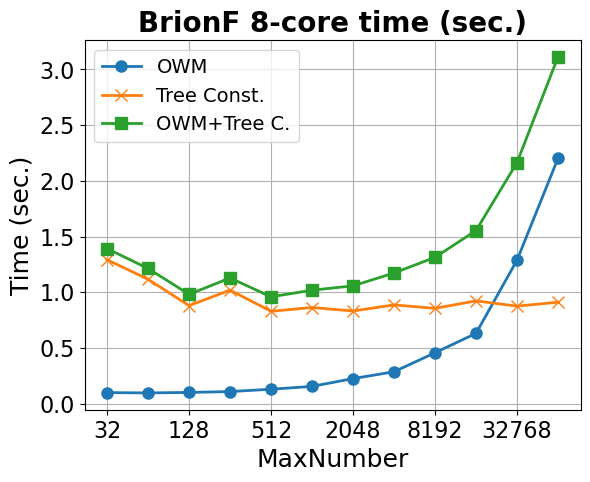

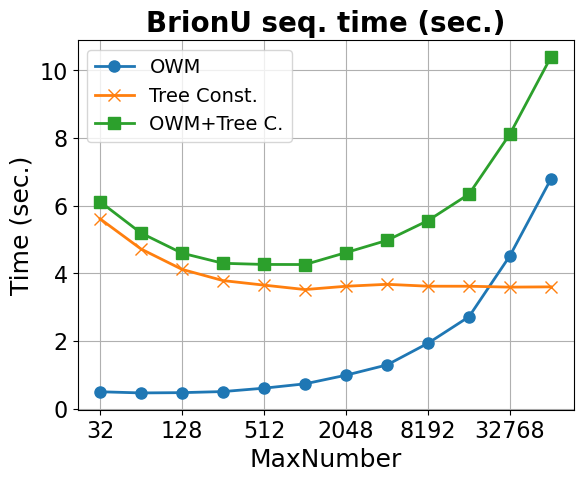

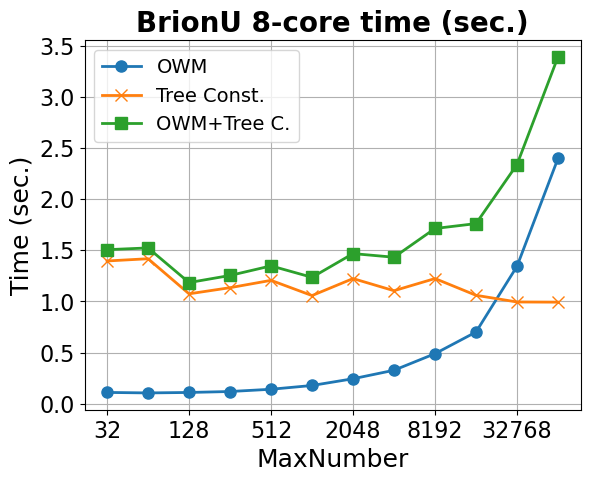

In [16]:

# Execution time for each cloud with tfm/parallelcpp version depending on minRadius
import matplotlib.pyplot as plt
def plot_cloudmaxnum(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()

    xticks=range(1,len(x)+1)

    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth][0]+results[cloudname][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Tree Const.','OWM+Tree C.']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MaxNumber', fontsize=xlabelfs)

    plt.xticks(ticks=xticks[::2], labels=x[::2], fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudmaxnum('Alcoy',1,res2)
plot_cloudmaxnum('Alcoy',8,res2)
plot_cloudmaxnum('Arzua',1,res2)
plot_cloudmaxnum('Arzua',8,res2)
plot_cloudmaxnum('BrionF',1,res2)
plot_cloudmaxnum('BrionF',8,res2)
plot_cloudmaxnum('BrionU',1,res2)
plot_cloudmaxnum('BrionU',8,res2)


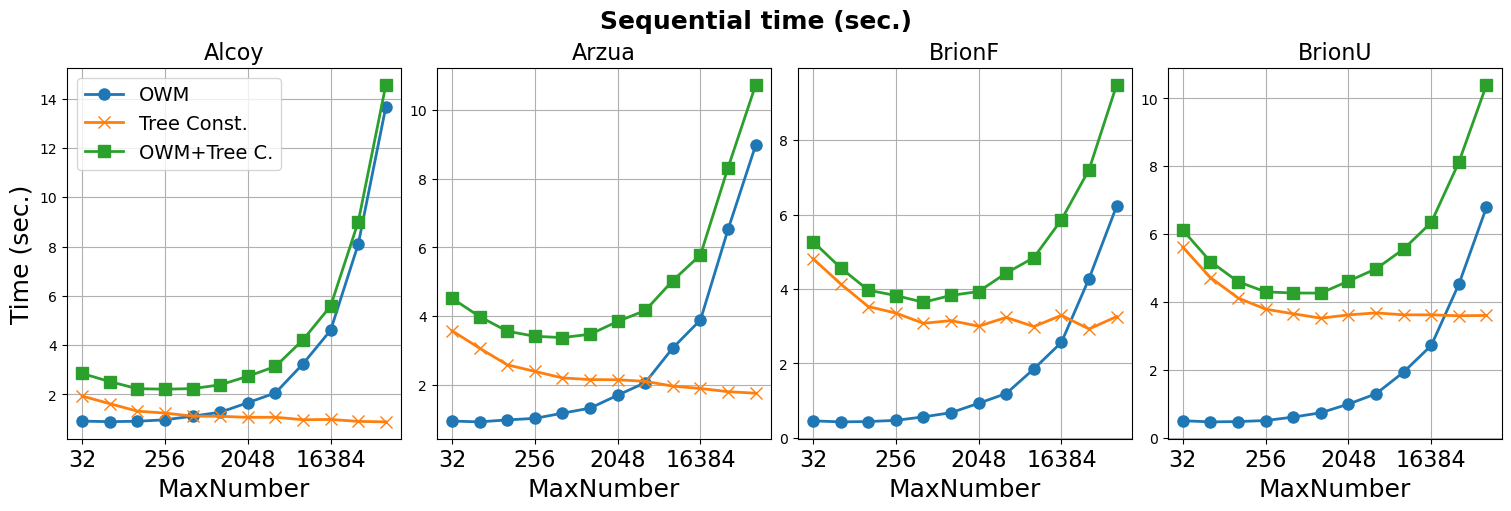

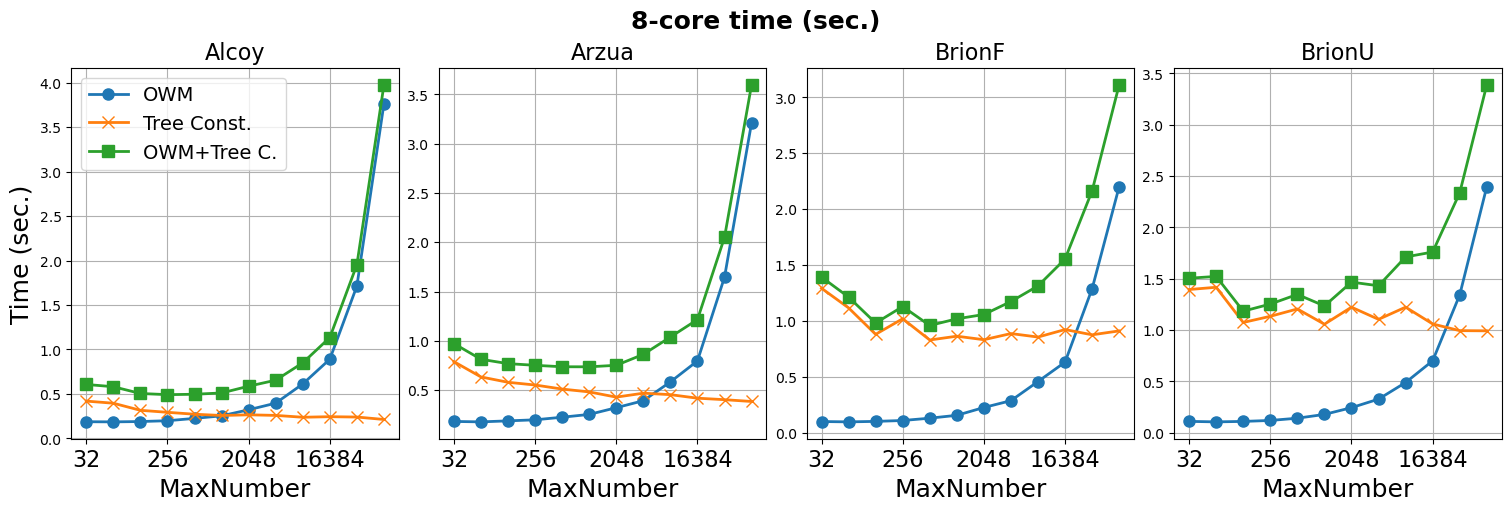

In [17]:

def plot_allmaxnum(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Tree Const.','OWM+Tree C.']
    x=list(results['Alcoy'].keys())
    xticks=range(1,len(x)+1)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):

        axs[i].plot(np.array(xticks), np.array([results[name][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth][0]+results[name][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)

        axs[i].set_xlabel('MaxNumber', fontsize=xlabelfs)
        axs[i].set_xticks(ticks=xticks[::3], labels=x[::3],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()

plot_allmaxnum(1,res2)
plot_allmaxnum(8,res2)


[1.         1.84609844 2.56727973 3.53641357 4.24028747]
[1.         1.84151118 2.57071228 3.85670499 4.32424674]
[1.         1.9282218  2.23337341 2.94270263 3.71119253]
[1.         1.81434817 2.25808675 3.02165626 3.33578957]
[1.         1.84550671 2.62479643 3.81648724 4.8853135 ]
[1.         1.94472335 2.74981088 4.03815227 5.19132596]
[1.         1.9258143  2.69669165 3.64252828 4.34948257]
[1.         1.84381079 2.65994335 3.59195807 4.32455756]
[1.         1.84609844 2.56727973 3.53641357 4.24028747]
[1.         1.90520085 2.49217378 3.6388027  4.30119566]
[1.         1.9282218  2.23337341 2.94270263 3.71119253]
[1.         1.87545269 2.79014324 3.29538418 3.03269748]


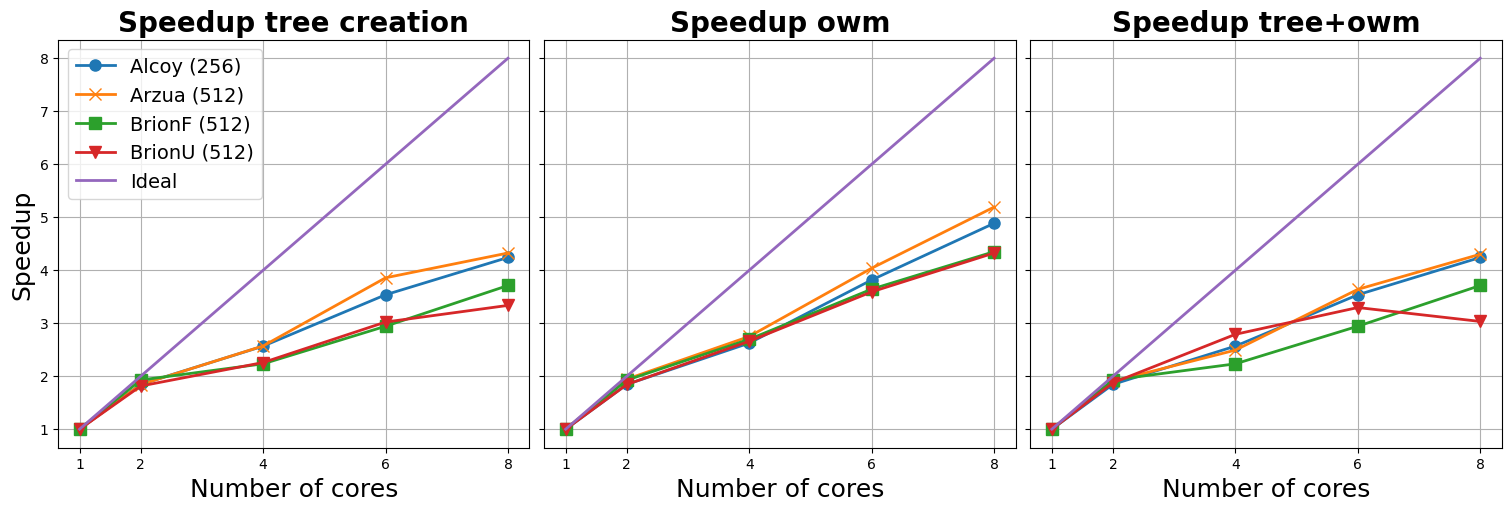

In [18]:
# Speed up (using total time) for the best maxNumber (for total time, that are [256,256,512,1024])
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

marks=['o-','x-','s-','v-','+-']

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)

for (i,z,k) in zip(res2,marks,[256,256,512,1024]):
    print(np.array([res2[i][k][1][0]/res2[i][k][j][0] for j in [1,2,4,6,8]]))
    axs[0].plot(np.array([1,2,4,6,8]), np.array([res2[i][k][1][0]/res2[i][k][j][0] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[0].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res2,marks,[256,512,512,512]):
    print(np.array([res2[i][k][1][2]/res2[i][k][j][2] for j in [1,2,4,6,8]]))
    axs[1].plot(np.array([1,2,4,6,8]), np.array([res2[i][k][1][2]/res2[i][k][j][2] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[1].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res2,marks,[256,512,512,512]):
    print(np.array([sum(res2[i][k][1][0:2:2])/sum(res2[i][k][j][0:2:2]) for j in [1,2,4,6,8]]))
    axs[2].plot(np.array([1,2,4,6,8]), np.array([sum(res2[i][k][1][0:2:2])/sum(res2[i][k][j][0:2:2]) for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[2].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=['Alcoy (256)', 'Arzua (512)', 'BrionF (512)', 'BrionU (512)']
sizes.append('Ideal')
axs[0].legend(sizes,loc='best', fontsize= legendfs)
axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
axs[0].set_title('Speedup tree creation',  fontweight='bold', fontsize=titlefs)
axs[0].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[0].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[0].grid()
axs[1].set_title('Speedup owm',  fontweight='bold', fontsize=titlefs)
axs[1].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[1].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[1].grid()
axs[2].set_title('Speedup tree+owm',  fontweight='bold', fontsize=titlefs)
axs[2].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[2].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[2].grid()